Here's how the data starts:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

<ipython-input-8-1208885420>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
<ipython-input-8-1208885420>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

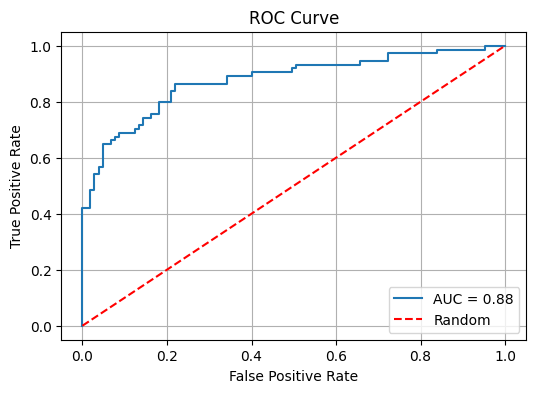

AUC score is: 0.8770913770913771


NameError: name 'df' is not defined

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

data = pd.read_csv('/content/train.csv')

print("Here's how the data starts:\n", data.head())
print("\nData types in each column:\n", data.dtypes)
print("\nMissing values in the dataset:\n", data.isnull().sum())

def clean_data(dataset):
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
    dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex'])
    dataset['Embarked'] = LabelEncoder().fit_transform(dataset['Embarked'])
    dataset = pd.get_dummies(dataset, columns=['Pclass'], prefix='Pclass')
    scaler = StandardScaler()
    dataset[['Fare', 'Age']] = scaler.fit_transform(dataset[['Fare', 'Age']])
    return dataset

processed = clean_data(data)
print("\nAfter cleaning, it looks like:\n", processed.head())

target = processed['Survived']
input_features = processed[['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked', 'SibSp', 'Parch']]

X_train, X_val, y_train, y_val = train_test_split(input_features, target, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

coef_series = pd.Series(clf.coef_[0], index=input_features.columns)
print("\nCoefficients:\n", coef_series)
print("Intercept:", clf.intercept_[0])

print("\nWhat it means:")
for var, val in coef_series.items():
    if val > 0:
        print(f"  → {var}: increases survival chances")
    else:
        print(f"  → {var}: lowers survival chances")

y_predicted = clf.predict(X_val)

print("\nAccuracy:", accuracy_score(y_val, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_val, y_predicted))
print("Precision:", precision_score(y_val, y_predicted))
print("Recall:", recall_score(y_val, y_predicted))
print("F1:", f1_score(y_val, y_predicted))

y_prob = clf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print("AUC score is:", roc_auc)

test_df = pd.read_csv('/content/test.csv')
original = test_df
test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(df['Embarked'].mode()[0])

X_test = preprocess(test_df)
features = ['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked', 'SibSp', 'Parch']
X_test = X_test[features]



y_test_pred = model.predict(X_test)
